<hr/>

# Data Mining
**Tamás Budavári** - budavari@jhu.edu <br/>

- Sampling from posterior
- Marginal likelihood
- Model comparison

<hr/>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
pylab.rcParams['figure.figsize'] = (4,3)

Populating the interactive namespace from numpy and matplotlib


### Probabilitistic Models
- From data $D$ we infer the parameters $\theta$ of model $M$ 

>$\displaystyle p(\theta \lvert D,M) = \frac{p(\theta \lvert M)\ p(D \lvert \theta,M)}{p(D \lvert M)}$ 

> or

>$\displaystyle p(\theta) = \frac{\pi(\theta)\,{\cal{}L}(\theta)}{\int \pi(\theta)\,{\cal{}L}(\theta)\ d\theta }$
>
> where $\displaystyle \int \pi(\theta)\,{\cal{}L}(\theta)\ d\theta \; $ could ensure that $\displaystyle \; \int p(\theta)\,d \theta = 1$ 

- Recall [posterior](https://en.wikipedia.org/wiki/Posterior_probability), [prior](https://en.wikipedia.org/wiki/Prior_probability), [likelihood](https://en.wikipedia.org/wiki/Likelihood_function), [normalization](https://en.wikipedia.org/wiki/Normalizing_constant#Bayes'_theorem)

### Characterization of Posterior PDF

- Mode, Mean, Covariance, etc... For example,

>$ \displaystyle \bar{\theta} = \int {\color{default}\theta}\ p(\theta)\ d\theta$
>$ \displaystyle =  \frac{\int \theta\,\pi(\theta)\,{\cal{}L}(\theta)\,d\theta}{\int \pi(\theta)\,{\cal{}L}(\theta)\,d\theta }$
>
> Recall [that](#Probabilitistic-Models)
>
>$\displaystyle p(\theta) = \frac{\pi(\theta)\,{\cal{}L}(\theta)}{\int \pi(\theta)\,{\cal{}L}(\theta)\ d\theta }$



- In general, numerical evaluation is required 

> Randomized algorithms;
> Sampling from distributions




### Caution!

- Noisy likelihood function with false peak(s)
 
> Misleading MLE by an erroneous spike?
 
- Mean could be completely off

> E.g., center of a ring 

### Sampling 

- How to calculate an integral such as

>$ \displaystyle \langle f(\theta)\rangle  =  \int f(\theta)\,p(\theta)\,d\theta $

- Approximation using $\{\theta_i\}$ sample from $p(\cdot)$

>$ \displaystyle \langle f(\theta)\rangle \approx \frac{1}{n}\sum_{i=1}^{n} f(\theta_i) $

- But we really don't know the posterior that well!

### Sampling from Prior

- Prior is better known 

> $ \displaystyle \langle f(\theta)\rangle =$
>$ \displaystyle \frac{\int f(\theta)\,\pi(\theta)\,{\cal{}L}(\theta)\,d\theta}{\int \pi(\theta)\,{\cal{}L}(\theta)\,d\theta }$
>
> Recall [that](#Probabilitistic-Models)
>
>$\displaystyle p(\theta) = \frac{\pi(\theta)\,{\cal{}L}(\theta)}{\int \pi(\theta)\,{\cal{}L}(\theta)\ d\theta }$


- Approximation using $\{\theta_i\}$ sample from $\pi(\cdot)$

>$ \displaystyle \langle f(\theta)\rangle \approx \frac{\sum f(\theta_i)\,{\cal{}L}(\theta_i)}{\sum {\cal{}L}(\theta_i)} $

### Sampling from ...

- E.g., likelihood?

>$ \displaystyle \langle f(\theta)\rangle \approx \frac{\sum f(\theta_i)\,\pi(\theta_i)}{\sum \pi(\theta_i)} $

- What about something "similar"?

### [Importance Sampling](https://en.wikipedia.org/wiki/Importance_sampling)

- We usually have integrals such as

>$ \displaystyle \langle f(\theta)\rangle = \int f(\theta)\,g(\theta)\,d\theta$

- If we can't sample from $g(\cdot)$ but can from a $h(\cdot)$ 

> s.t. $\ \ \ g(\theta) \leq K \cdot h(\theta) \ \ \ $ for any $\theta$ and a suitably large $K$

>$\displaystyle \langle f(\theta)\rangle \approx \frac{1}{n} \sum_i^n f(\theta_i)\,\frac{g(\theta_i)}{h(\theta_i)}$

### Markov-chain Monte Carlo a.k.a. [MCMC](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo)

- Instead of independent samples, produce a chain of samples in a special way

> **Metropolis-Hastings**
> 0. Start from a random $\theta_t = \theta_0$ parameter set
> 0. Obtain a new $\theta'$ from a proposal distribution $Q(\theta;\theta_t)$
> 0. Accept $\theta_{t+1} = \theta'$ with probability $g(\theta')/g(\theta_t)$
> 0. Let $t\leftarrow t\!+\!1$ and go to Step 2.

- Use the samples of the chain as if taken from the posterior PDF

  - Many other variants 

  - Watch out for burn in, correlations, etc...

### For example

<img src=https://upload.wikimedia.org/wikipedia/commons/a/a6/3dRosenbrock.png width=400 align=left>

### Model Comparison

- Bayesian hypothesis testing

> Posterior probability of a model given the data vs another (odds)

>$\displaystyle \frac{P(M_1 \lvert D)}{P(M_2 \lvert D)} = \frac{P(M_1)\ p(D \lvert M_1)\,\big/\,p(D)}{P(M_2)\ p(D \lvert M_2)\,\big/\,p(D)}$
>$\displaystyle = \frac{P(M_1)}{P(M_2)} \frac{p(D \lvert M_1)}{p(D \lvert M_2)}$
>
>$\displaystyle \hspace{3.7em} = \frac{P(M_1)}{P(M_2)}\  B(M_1,M_2 \lvert D)$

> Posterior odds $=$ Prior odds $\times$ the Bayes factor

- Also see [Bayes factor](https://en.wikipedia.org/wiki/Bayes_factor), [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion) and [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion)

### [Marginal Likelihood](https://en.wikipedia.org/wiki/Marginal_likelihood)

- Integral over all parameters

>$\displaystyle p(D \lvert M) = \int  p(\theta \lvert M)\ p(D \lvert \theta,M)\,d\theta$ 


> Cf. [Bayes' rule](https://en.wikipedia.org/wiki/Bayes%27_theorem#Statement_of_theorem)

>$\displaystyle p(\theta \lvert D,M) = \frac{p(\theta \lvert M)\ p(D \lvert \theta,M)}{p(D \lvert M)}$ 

- No improper prior here!

### Complementer Hypotheses

- I.e., $P(M_1) + P(M_2) = 1$ also $P(M_1 \lvert D) + P(M_2 \lvert D) = 1$ 

> Let $P$ represent $P(M_1 \lvert D)$ and $P_0$ be $P(M_1)$, then recall in [Model Comparison](#Model-Comparison), we have

>$\displaystyle \frac{P}{1-P} = \frac{P_0}{1-P_0} B$

> Hence

>$\displaystyle P = \left[ 1 + \frac{1-P_0}{P_0 B} \right]^{-1}   $

- Examples

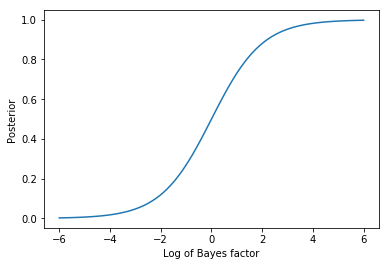

In [2]:
# Posterior as fn of ln(B)
logB = np.linspace(-6,6,100) 
B = np.exp(logB)
P0 = 0.5
P = 1 / (1 + (1-P0)/(P0*B)) 

plot(logB, P, '-');
xlabel('Log of Bayes factor'); 
ylabel('Posterior');

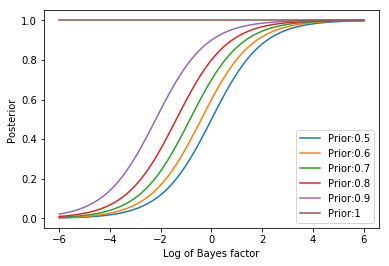

In [3]:
# Posterior as fn of ln(B), change prior
for P0 in [0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    P = 1 / (1 + (1-P0)/(P0*B)) 
    plt.plot(logB, P,'-', label='Prior:'+str(P0));
    
# sigmoid function cf. neural networks
xlabel('Log of Bayes factor'); 
ylabel('Posterior'); 
legend(loc=4); 
ylim(None, 1.05);

- [Sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function), more later